In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D, Conv2D

/Users/sachinsen/tfod/lib/python3.10/site-packages/tensorflow_io-0.32.0-py3.10-macosx-11.1-arm64.egg/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/sachinsen/tfod/lib/python3.10/site-packages/tensorflow_io-0.32.0-py3.10-macosx-11.1-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/sachinsen/tfod/lib/python3.10/site-packages/tensorflow_io-0.32.0-py3.10-macosx-11.1-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/sachinsen/tfod/lib/python3.10/site-packages/tensorflow_io-0.32.0-py3.10-macosx-11.1-arm64.egg/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/Users/sachinsen/tfod/lib/

In [61]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3), input_shape= (64,64,3), activation='relu'))
classifier.add(Conv2D(64,(3,3), activation='tanh'))
#classifier.add(Conv2D(20,(3,3), activation='tanh'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


classifier.add(Conv2D(20,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))

classifier.add(Dense(units=128, activation='relu'))

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))


classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])






In [62]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 20)        11540     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3920)             

In [63]:
# part 2

from keras.preprocessing.image import ImageDataGenerator


train_datagen =ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen =ImageDataGenerator(rescale=1./255)


In [67]:
#/Users/sachinsen/Documents/DL Project/dogcat/cats_and_dogs_filtered
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

training_set=train_datagen.flow_from_directory('/Users/sachinsen/Documents/DL Project/dogcat/cats_and_dogs_filtered/train',
                                 target_size=(64,64),
                                 batch_size=32,
                                 class_mode='binary')

test_set=test_datagen.flow_from_directory('/Users/sachinsen/Documents/DL Project/dogcat/cats_and_dogs_filtered/validation',
                                 target_size=(64,64),
                                 batch_size=32,
                                 class_mode='binary')


model = classifier.fit(training_set,
                        steps_per_epoch=100,
                        epochs=1,
                        validation_data=test_set,
                        validation_steps=20,shuffle=True)

classifier.save('model.h5')
print('model saved')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'repeat'

In [80]:
import numpy as np
from keras.utils import load_img,img_to_array
from keras.preprocessing import image

test_img= load_img('/Users/sachinsen/Documents/DL Project/dogcat/cat.jpg',target_size=(64,64))

test_img= img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)



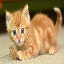

In [81]:
load_img('/Users/sachinsen/Documents/DL Project/dogcat/cat.jpg',target_size=(64,64))

In [82]:
from keras.models import load_model

model = load_model('model.h5')
result= model.predict(test_img)

training_set.class_indices

if result[0][0] == 1:
    print("dog")
else:
    print('cat')




1/1 [==============================] - 0s 32ms/step
cat


In [83]:
result[0][0]

0.9998359

In [84]:
training_set.class_indices


{'cats': 0, 'dogs': 1}

In [85]:
classifier.predict(test_img)

1/1 [==============================] - 0s 47ms/step


array([[0.9998359]], dtype=float32)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/Users/sachinsen/Documents/DL Project/dogcat/cats_and_dogs_filtered/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/Users/sachinsen/Documents/DL Project/dogcat/cats_and_dogs_filtered/validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

train_dataset = tf.data.Dataset.from_generator(
    lambda: training_set,
    output_signature=(
        tf.TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
).repeat()  # Repeat the dataset indefinitely

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_set,
    output_signature=(
        tf.TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
)

model = classifier.fit(
    train_dataset,
    steps_per_epoch=100,
    epochs=1,
    validation_data=test_dataset,
    validation_steps=20,
    shuffle=True
)

classifier.save('model.h5')
print('Model saved')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
100/100 [==============================] - 9s 88ms/step - loss: 0.0743 - accuracy: 0.9730 - val_loss: 2.1033 - val_accuracy: 0.6609
Model saved
